# Predicting food environment index for 2018

This academic project was completed as a part of University of Washington's Certificate Course in Data Science.

Changing lifestyles around the world has immensely impacted human health. Especially in the USA, problems around obesity are on the rise and thus, the government has been keeping track of obesity and food environment index in order to track the progress of the measures taken in that direction. In this project, we will predict if the measures taken so far have had any effect on the Country's health by estimating the food environment index from the adult obesity data.

In order to do that, we need two datasets from the USA government website, "datausa", namely the last 5 years of data from USA for adult obesity and food environment index. This historical data will be used for training the machine learning model to predict the food environment index in 2018 based on the obesity and food environment index data for the previous years.

## Data Sets

The two data sources for this task are:

1. First dataset on adult obesity: https://datausa.io/visualize?groups=0-Z1X72Pg&measure=Z1iORxu
2. Second dataset on food environment index: https://datausa.io/visualize?groups=0-Z1X72Pg&measure=Z1xNbvc

Let's start with loading the data and taking a look at the two data sets.

In [1]:
# Import libraries
import os
import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [2]:
current_dir = os.getcwd()

# Loading the datasets
obesity = pd.read_csv(current_dir + "/Data_USA_Obesity.csv", sep=',', header=0)
fei = pd.read_csv(current_dir + "/Data_USA_FEI.csv", sep=',', header=0)

In [3]:
obesity.head()

,ID Geography,Geography,Adult Obesity (2014),Adult Obesity (2015),Adult Obesity (2016),Adult Obesity (2017),Adult Obesity (2018)
0,05000US20201,"Washington County, KS",0.341,0.334,0.320,0.307,0.312
1,05000US56045,"Weston County, WY",0.313,0.288,0.294,0.292,0.320
2,05000US01001,"Autauga County, AL",0.305,0.313,0.309,0.341,0.364
3,05000US36119,"Westchester County, NY",0.172,0.178,0.196,0.203,0.208
4,05000US36115,"Washington County, NY",0.283,0.290,0.298,0.319,0.308


In [4]:
fei.head()

,ID Geography,Geography,Food Environment Index (2014),Food Environment Index (2015),Food Environment Index (2016),Food Environment Index (2017),Food Environment Index (2018)
0,05000US56045,"Weston County, WY",8.445,8.1,8.0,8.0,8.1
1,05000US36113,"Warren County, NY",8.817,8.3,8.1,8.1,8.4
2,05000US01001,"Autauga County, AL",7.445,7.2,7.1,6.9,7.1
3,05000US36115,"Washington County, NY",8.944,8.4,8.1,8.2,8.3
4,05000US36111,"Ulster County, NY",8.514,8.1,7.9,8.1,8.1


Looking at the two data sets, it's clear that they are for the same geographic locations. Thus, we will need to combine the two data sets into one based on the geography.

In [5]:
# Merge the two datasets based on the geography
obesity_fei_df = pd.merge(obesity, fei, on=['Geography'], how='inner')
obesity_fei_df.head()

,ID Geography_x,Geography,Adult Obesity (2014),Adult Obesity (2015),Adult Obesity (2016),Adult Obesity (2017),Adult Obesity (2018),ID Geography_y,Food Environment Index (2014),Food Environment Index (2015),Food Environment Index (2016),Food Environment Index (2017),Food Environment Index (2018)
0,05000US20201,"Washington County, KS",0.341,0.334,0.320,0.307,0.312,05000US20201,7.128,6.8,6.6,6.6,7.1
1,05000US56045,"Weston County, WY",0.313,0.288,0.294,0.292,0.320,05000US56045,8.445,8.1,8.0,8.0,8.1
2,05000US01001,"Autauga County, AL",0.305,0.313,0.309,0.341,0.364,05000US01001,7.445,7.2,7.1,6.9,7.1
3,05000US36119,"Westchester County, NY",0.172,0.178,0.196,0.203,0.208,05000US36119,9.085,8.8,8.9,9.0,9.2
4,05000US36115,"Washington County, NY",0.283,0.290,0.298,0.319,0.308,05000US36115,8.944,8.4,8.1,8.2,8.3


## Exploratory Data Analysis

In this section, we will look at some basic summary statistics and perform data visualization to know more about our data. Since, the aim of our project is to predict the food environment index, we need to know which features actually have an impact on the food environment index values and which features in our data set are correlated.

In [6]:
obesity_fei_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 13 columns):
ID Geography_x                   3142 non-null object
Geography                        3142 non-null object
Adult Obesity (2014)             3135 non-null float64
Adult Obesity (2015)             3135 non-null float64
Adult Obesity (2016)             3135 non-null float64
Adult Obesity (2017)             3135 non-null float64
Adult Obesity (2018)             3142 non-null float64
ID Geography_y                   3142 non-null object
Food Environment Index (2014)    3135 non-null float64
Food Environment Index (2015)    3135 non-null float64
Food Environment Index (2016)    3135 non-null float64
Food Environment Index (2017)    3135 non-null float64
Food Environment Index (2018)    3123 non-null float64
dtypes: float64(10), object(3)
memory usage: 306.8+ KB


In [7]:
obesity_fei_df.dtypes

ID Geography_x                    object
Geography                         object
Adult Obesity (2014)             float64
Adult Obesity (2015)             float64
Adult Obesity (2016)             float64
Adult Obesity (2017)             float64
Adult Obesity (2018)             float64
ID Geography_y                    object
Food Environment Index (2014)    float64
Food Environment Index (2015)    float64
Food Environment Index (2016)    float64
Food Environment Index (2017)    float64
Food Environment Index (2018)    float64
dtype: object

In [8]:
obesity_fei_df.describe()

,Adult Obesity (2014),Adult Obesity (2015),Adult Obesity (2016),Adult Obesity (2017),Adult Obesity (2018),Food Environment Index (2014),Food Environment Index (2015),Food Environment Index (2016),Food Environment Index (2017),Food Environment Index (2018)
count,3135.000000,3135.000000,3135.000000,3135.000000,3142.000000,3135.000000,3135.000000,3135.000000,3135.000000,3123.000000
mean,0.305515,0.306849,0.309411,0.310124,0.314737,7.374794,7.074322,6.960319,7.025710,7.408421
std,0.042392,0.043381,0.044622,0.045222,0.045141,1.243250,1.251845,1.230075,1.259365,1.186207
min,0.131000,0.120000,0.107000,0.118000,0.128000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283000,0.284000,0.285000,0.283000,0.288000,6.765500,6.500000,6.350000,6.400000,6.900000
50%,0.307000,0.309000,0.312000,0.312000,0.318000,7.578000,7.300000,7.200000,7.300000,7.600000
75%,0.331000,0.334000,0.337000,0.338000,0.344000,8.211000,7.900000,7.800000,7.900000,8.200000
max,0.479000,0.481000,0.466000,0.476000,0.478000,10.000000,10.000000,10.000000,10.000000,10.000000


Except the two ID variables and the Geography feature, all the other features in our merged data set are numeric. But, we will need to take care of the missing values and see if there are any outliers in the numeric columns before we move forward.

### Data Cleaning and visualization

In [9]:
# Checking null values
len(obesity_fei_df[obesity_fei_df.isna().any(axis=1)])

26

The number of rows with missing values is only 0.8% of the total data and hence, can be removed.

In [10]:
# Removing null/missing values
obesity_fei_df = obesity_fei_df.dropna()

After taking care of the null values, it's time to look at some plots to know more about the data.

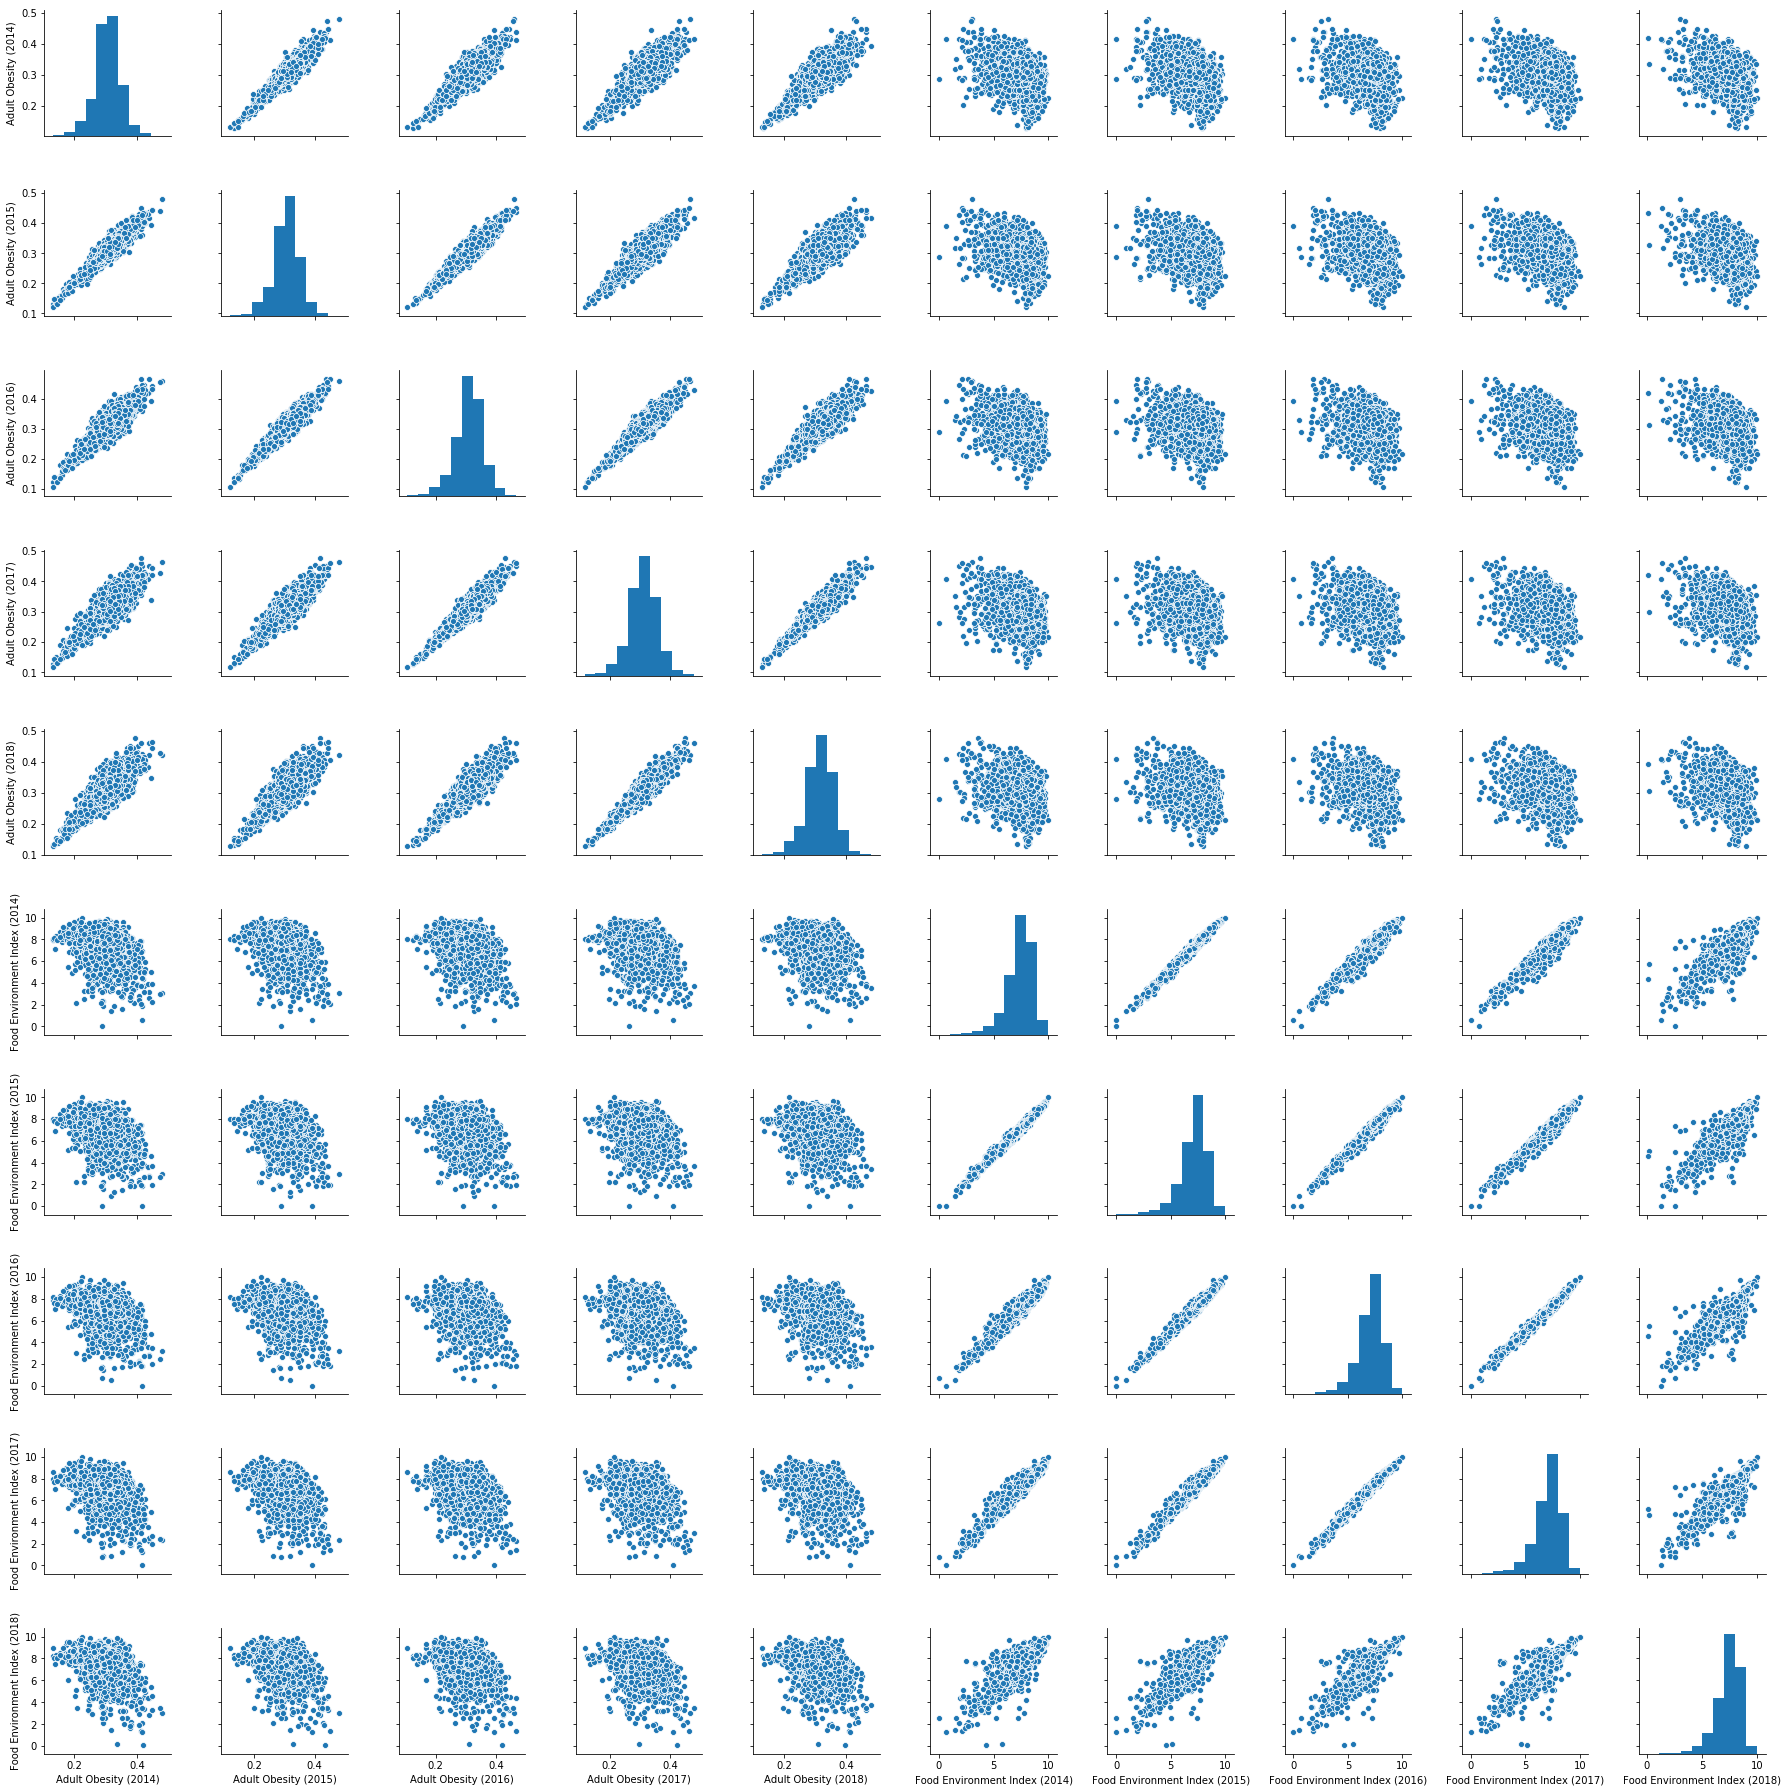

In [11]:
sns.pairplot(obesity_fei_df)

The pairwise scatter plot gives a clear indication that the adult obesity for different years have high correlation among themselves and same is the case for the food environment index values for different years. But, even though the correlation between adult obesity and food environment index isn't as high, it seems that the two features do have some impact on each other. This confirms that, it is possible to predict the food environment index for 2018 using the adult obesity values!

Now, notice that the geographic locations are all unique. But, let's separate the state locations so that we can look at the distribution of data from various states.

In [12]:
geography = obesity_fei_df['Geography']
list_of_places = []
for place in geography:
    list_of_places.append(place[-2:])
obesity_fei_df['State'] = list_of_places
obesity_fei_df.head()

,ID Geography_x,Geography,Adult Obesity (2014),Adult Obesity (2015),Adult Obesity (2016),Adult Obesity (2017),Adult Obesity (2018),ID Geography_y,Food Environment Index (2014),Food Environment Index (2015),Food Environment Index (2016),Food Environment Index (2017),Food Environment Index (2018),State
0,05000US20201,"Washington County, KS",0.341,0.334,0.320,0.307,0.312,05000US20201,7.128,6.8,6.6,6.6,7.1,KS
1,05000US56045,"Weston County, WY",0.313,0.288,0.294,0.292,0.320,05000US56045,8.445,8.1,8.0,8.0,8.1,WY
2,05000US01001,"Autauga County, AL",0.305,0.313,0.309,0.341,0.364,05000US01001,7.445,7.2,7.1,6.9,7.1,AL
3,05000US36119,"Westchester County, NY",0.172,0.178,0.196,0.203,0.208,05000US36119,9.085,8.8,8.9,9.0,9.2,NY
4,05000US36115,"Washington County, NY",0.283,0.290,0.298,0.319,0.308,05000US36115,8.944,8.4,8.1,8.2,8.3,NY


Text(0.5, 1.0, 'Bar Plot of State')

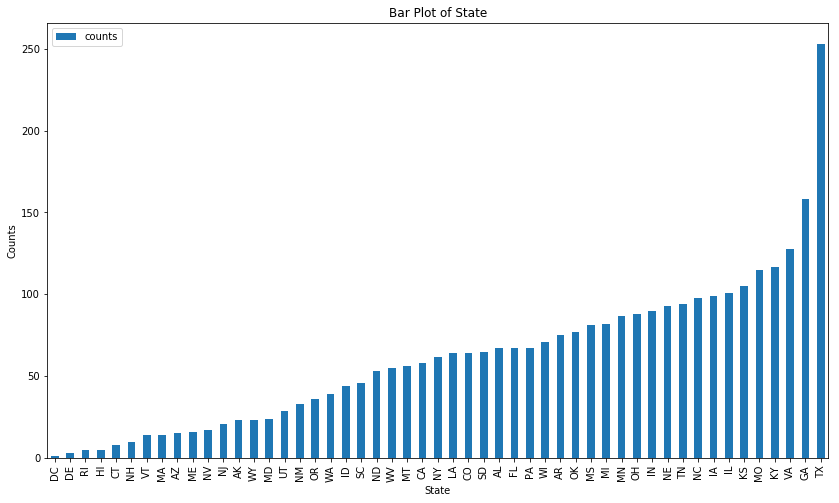

In [13]:
%matplotlib inline

obesity_fei_df['counts']=1
ax = obesity_fei_df.loc[:, ['State', 'counts']].groupby(['State']).agg('count').sort_values('counts').plot.bar(figsize=(14,8))
ax.set_ylabel('Counts')
ax.set_title('Bar Plot of State')

It turns out that, Texas, Georgia and Virginia are the three states with the most observations in our data set. Since, the count of observations for the other states are approximately less than half of the count for the Texas (the state with the most observations), we will use only these three states for the next visualization.

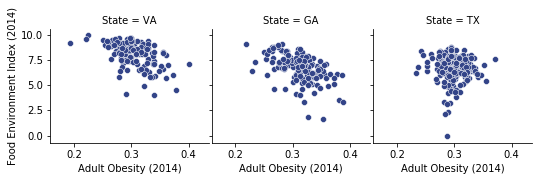

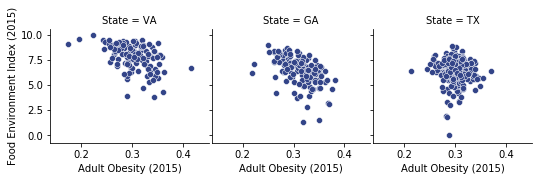

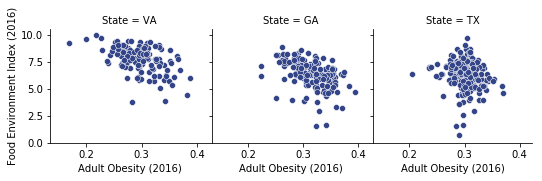

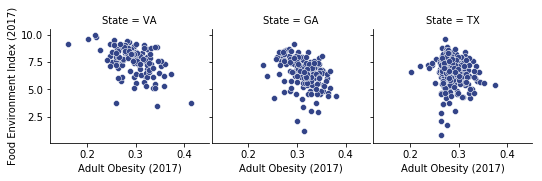

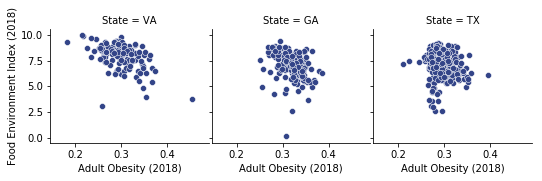

In [14]:
high_count_state = obesity_fei_df[obesity_fei_df.groupby('State')['State'].transform('size') > 120]
# Scatter plots for all the years
g = sns.FacetGrid(high_count_state, col="State", margin_titles=True, height=2.5)
g.map(plt.scatter, "Adult Obesity (2014)", "Food Environment Index (2014)", color="#334488", edgecolor="white", lw=.5)
g.set_axis_labels("Adult Obesity (2014)", "Food Environment Index (2014)")
g.fig.subplots_adjust(wspace=.02, hspace=.02)

g = sns.FacetGrid(high_count_state, col="State", margin_titles=True, height=2.5)
g.map(plt.scatter, "Adult Obesity (2015)", "Food Environment Index (2015)", color="#334488", edgecolor="white", lw=.5)
g.set_axis_labels("Adult Obesity (2015)", "Food Environment Index (2015)")
g.fig.subplots_adjust(wspace=.02, hspace=.02)

g = sns.FacetGrid(high_count_state, col="State", margin_titles=True, height=2.5)
g.map(plt.scatter, "Adult Obesity (2016)", "Food Environment Index (2016)", color="#334488", edgecolor="white", lw=.5)
g.set_axis_labels("Adult Obesity (2016)", "Food Environment Index (2016)")
g.fig.subplots_adjust(wspace=.02, hspace=.02)

g = sns.FacetGrid(high_count_state, col="State", margin_titles=True, height=2.5)
g.map(plt.scatter, "Adult Obesity (2017)", "Food Environment Index (2017)", color="#334488", edgecolor="white", lw=.5)
g.set_axis_labels("Adult Obesity (2017)", "Food Environment Index (2017)")
g.fig.subplots_adjust(wspace=.02, hspace=.02)

g = sns.FacetGrid(high_count_state, col="State", margin_titles=True, height=2.5)
g.map(plt.scatter, "Adult Obesity (2018)", "Food Environment Index (2018)", color="#334488", edgecolor="white", lw=.5)
g.set_axis_labels("Adult Obesity (2018)", "Food Environment Index (2018)")
g.fig.subplots_adjust(wspace=.02, hspace=.02)


Looking at the above plot, following observations can be made about the three states:
1. Virginia consistently has a large number of data points in the high food environment index range. But, as we move from 2014 to 2018, the adult obesity values have noticeably shifted to the lower end.
2. On the other hand, there isn't any significant change in the data points of Georgia and Texas over the years.

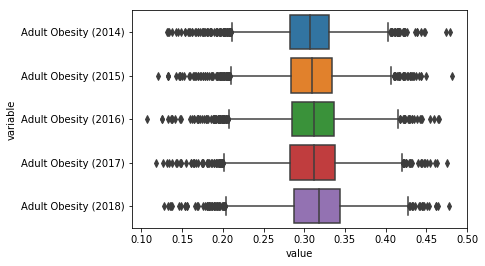

In [15]:
# Outlier detection
sns.boxplot(x="value", y="variable", data=pd.melt(obesity_fei_df.iloc[:,2:7]))

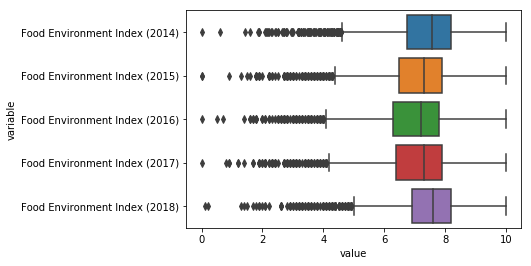

In [16]:
sns.boxplot(x="value", y="variable", data=pd.melt(obesity_fei_df.iloc[:, 8:13]))

As can be seen, the outliers comprise of a not-so-small percentage of the total data set. Removing these outliers would mean losing a lot of information and is not recommended. Thus, we will use a model that deals with outliers without losing on any information.

## Feature Scaling and Selection

Notice that, the scale of the values under Adult Obesity and the values under Food Environment Index differs by a factor of 10. We need to have all the features on the same scale to make sure each feature is equally important and that none of them dominates. Hence, we will use min-max scaler to scale the features.

### Feature Scaling

In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = obesity_fei_df.select_dtypes(include=float).columns
obesity_fei_df[numeric_cols] = pd.DataFrame(scaler.fit_transform(obesity_fei_df[numeric_cols]),index=obesity_fei_df.index)
obesity_fei_df.head()

,ID Geography_x,Geography,Adult Obesity (2014),Adult Obesity (2015),Adult Obesity (2016),Adult Obesity (2017),Adult Obesity (2018),ID Geography_y,Food Environment Index (2014),Food Environment Index (2015),Food Environment Index (2016),Food Environment Index (2017),Food Environment Index (2018),State,counts
0,05000US20201,"Washington County, KS",0.603448,0.592798,0.593315,0.527933,0.525714,05000US20201,0.7128,0.68,0.66,0.66,0.707071,KS,1
1,05000US56045,"Weston County, WY",0.522988,0.465374,0.520891,0.486033,0.548571,05000US56045,0.8445,0.81,0.80,0.80,0.808081,WY,1
2,05000US01001,"Autauga County, AL",0.500000,0.534626,0.562674,0.622905,0.674286,05000US01001,0.7445,0.72,0.71,0.69,0.707071,AL,1
3,05000US36119,"Westchester County, NY",0.117816,0.160665,0.247911,0.237430,0.228571,05000US36119,0.9085,0.88,0.89,0.90,0.919192,NY,1
4,05000US36115,"Washington County, NY",0.436782,0.470914,0.532033,0.561453,0.514286,05000US36115,0.8944,0.84,0.81,0.82,0.828283,NY,1


### Feature Engineering

There are some redundant features in the data set which need to be removed. The features 'ID Geography_x' and 'ID Geography_y' are exactly the same and hence, we will remove one of them and use the other one as an index for our dataframe. Additionally, the 'Geography' feature essentially gives the same information as 'ID geography'. Since, we are using the 'ID geography' as an index, we will remove the 'Geography' feature. Finally, we had added the 'counts' feature for data exploration purposes and it is no longer requires, so we will remove this feature too. The final dataframe consists of the 'ID geography' as an index, the adult obesity data from 2014 to 2018 and the food environment index data from 2014 to 2018.

In [18]:
obesity_fei_df.drop(columns=['Geography','ID Geography_y', 'counts'], inplace=True)
obesity_fei_df.rename(columns={'ID Geography_x':'ID Geography'}, inplace=True)
obesity_fei_df.set_index('ID Geography', inplace=True)

In [19]:
obesity_fei_df.dtypes

Adult Obesity (2014)             float64
Adult Obesity (2015)             float64
Adult Obesity (2016)             float64
Adult Obesity (2017)             float64
Adult Obesity (2018)             float64
Food Environment Index (2014)    float64
Food Environment Index (2015)    float64
Food Environment Index (2016)    float64
Food Environment Index (2017)    float64
Food Environment Index (2018)    float64
State                             object
dtype: object

Finally, "State" is the only categorical variable in the data set and thus, needs to be converted to a numeric variable.

In [20]:
obesity_fei_df = pd.get_dummies(obesity_fei_df)
obesity_fei_df.head()

,Adult Obesity (2014),Adult Obesity (2015),Adult Obesity (2016),Adult Obesity (2017),Adult Obesity (2018),Food Environment Index (2014),Food Environment Index (2015),Food Environment Index (2016),Food Environment Index (2017),Food Environment Index (2018),...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
ID Geography,,,,,,,,,,,,,,,,,,,,,
05000US20201,0.603448,0.592798,0.593315,0.527933,0.525714,0.7128,0.68,0.66,0.66,0.707071,...,0,0,0,0,0,0,0,0,0,0
05000US56045,0.522988,0.465374,0.520891,0.486033,0.548571,0.8445,0.81,0.80,0.80,0.808081,...,0,0,0,0,0,0,0,0,0,1
05000US01001,0.500000,0.534626,0.562674,0.622905,0.674286,0.7445,0.72,0.71,0.69,0.707071,...,0,0,0,0,0,0,0,0,0,0
05000US36119,0.117816,0.160665,0.247911,0.237430,0.228571,0.9085,0.88,0.89,0.90,0.919192,...,0,0,0,0,0,0,0,0,0,0
05000US36115,0.436782,0.470914,0.532033,0.561453,0.514286,0.8944,0.84,0.81,0.82,0.828283,...,0,0,0,0,0,0,0,0,0,0


## Preliminary Data Model

We want to predict the food environment index for 2018 based on all the other features. Since, our target variable is a continuous variable, it will be a regression problem. As mentioned during the data exploration, there are some outliers in the data which if removed will lead to a lot of data loss. Thus, we will use a decision tree regressor as a preliminary model, since it is more robust to outliers.

### Split the data

In [21]:
# Separate the features and labels

target = obesity_fei_df.loc[:, "Food Environment Index (2018)"]     # Load target into target DF
features = obesity_fei_df.drop(columns=["Food Environment Index (2018)"])   # load features into feature DF

In [22]:
# Ensure that the decision tree is deterministic
np.random.seed(101)

# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)

### Fitting the model

In [23]:
# Fit a regression model
reg = DecisionTreeRegressor(random_state=1, max_depth=2, min_samples_leaf=3, min_samples_split=3)
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

One of the most common downsides of decision tree is that it is prone to overfitting. But, it is possible to avoid this problem by fine tuning the hyperparameters. Following are the specific hyperparameters we are tuning:

1. A higher max_depth parameter value ensures that the model is able to learn relations specific to a sample. But, too high values can cause over-fitting and hence, we are using a maximum vertical depth of 2.
2. The min_samples_leaf value can be tuned to control over-fitting. But, too high values can lead to under-fitting. Hence, we are settling for an optimum value of 3.
3. The behaviour of the min_samples_split value is similar to the min_samples_leaf value. We are using a min_samples_split value of 3.

After fitting the decision tree regressor, it is time to use the model to make predictions on our testing data and evaluate the performance of the model.

### Performance Evaluation

The main performance metrics we will use for our multiple regression problems are, R-squared and RMSE. R-squared shows how much better the model is than the null model which consists of not using any information from the explanatory variables and just predicting the average. Thus, **the closer the value of R-squared to 1, the better our model is.** But, an R-squared value can be misleading, since adding more features can lead to increase in R-squared value. Hence, we also use Root mean square error (RMSE) to measure the "accuracy" of our model. In general, **the lower the RMSE value, the better our model fits the actual data.**

In [24]:
# Predict and evaluate the training data
train_pred = reg.predict(X_train)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, train_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, train_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

Mean Absolute Error: 0.042445716696995914
Mean Squared Error: 0.003724513558119766
Root Mean Squared Error: 0.06102879286140081


In [25]:
# Predict and evaluate the testing data
test_pred = reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.04158179825273261
Mean Squared Error: 0.0041766863898680135
Root Mean Squared Error: 0.0646272882756813


The RMSE values of the training and the testing data are pretty close to each other, meaning that tuning our hyperparameters has helped solve the over-fitting problem.

In [26]:
print ("R-squared for Train: {}".format(reg.score(X_train, y_train)))
print ("R-squared for Test: {}".format(reg.score(X_test, y_test)))

R-squared for Train: 0.7381035811003649
R-squared for Test: 0.6920006206870626


The R-squared values for the training and testing data set are also pretty close, confirming that there's no over-fitting. However, the RMSE is slightly high and the R-squared values are average. Thus, the values look like they can be improved.

## Improved Machine Learning Model

To improve the prediction accuracy of decision trees, boosting algorithms are used. We will use a popular boosting algorithm, called gradient boosting.

### Fitting the model

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate, fit and predict. 
gbrt=GradientBoostingRegressor(n_estimators=100, random_state=1, max_depth=2, min_samples_leaf=3, min_samples_split=3)

Notice that, we are using the same hyperparameters that we used in the decision tree model. There is one additional hyperparameter, n_estimators, which denotes the number of boosting stages to perform. Let's decide the number of boosting stages by using Grid Search.

In [28]:
# Finding the best parameters using Grid Search CV
parameters = {"n_estimators":[100, 200, 300]}
grid_gbrt = GridSearchCV(gbrt, parameters, cv=10).fit(X_train, y_train)
print ("Best parameters - ", grid_gbrt.best_params_)

Best parameters -  {'n_estimators': 100}


Turns out, the best value for n_estimators is the default value. Let's go ahead with that and evaluate the model to see if it has actually improved upon the decision tree regressor.

### Performance Evaluation

In [29]:
test_pred2 = grid_gbrt.predict(X_test)
print ("Grid best score: ", grid_gbrt.best_score_)
print ("R-squared for Train: {}".format(grid_gbrt.score(X_train, y_train)))
print ("R-squared for Test: {}".format(grid_gbrt.score(X_test, y_test)))

Grid best score:  0.8421811252315896
R-squared for Train: 0.8746497984435867
R-squared for Test: 0.8043045947078289


In [30]:
train_pred2 = grid_gbrt.predict(X_train)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, train_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, train_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, train_pred2)))

Mean Absolute Error: 0.023872968420119548
Mean Squared Error: 0.0017826457008135784
Root Mean Squared Error: 0.04222138913884263


In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred2)))

Mean Absolute Error: 0.025816566625940486
Mean Squared Error: 0.002653766178577436
Root Mean Squared Error: 0.05151471807723921


The R-squared values have improved a lot. But, more importantly, the RMSE values of training and testing data are lower than we got in the decision tree model, thus implying that we have improved the performance of our model.

## Analysing Model Performance

It is obvious that, the gradient boosting model is a clear improvement on the decision tree regressor when we look at the R-squared for both the training and the testing data set. Additionally, RMSE values have gone down significantly on both the training and testing data sets. We haven't added or reduced the data or the number of features in the data and we used the same values for the hyperparameters. Thus, the only reason for the improvement in the values of the evaluation metrics can be the boosting algorithm itself.


To improve the model further, a few things can prove useful:

1. Adding more data: The data set currently has only 3116 observations. Adding more data could significantly improve the model performance by decreasing the variance without compromising on the bias.
2. Adding more features: Adding more features relevant to our analysis, like common characteristics or behavioural patterns of the people in one geographic location that could impact their health or adding obesity and food environment index for years before 2014. This could decrease the bias and increase model flexibility.
3. Reduce the selection bias: Currently, "Texas" dominates the observations by having almost 250 observations from the state, which is significantly more than the other states. If more data can be collected from other states, it will reduce the selection bias and improve the model performance.

If any of these methods could be applied to improve the model, we will be able to predict the adult obesity or the food environment index more accurately for the future. This will really be useful, since we can know if the current measures for health awareness are actually working or not and then, we can plan better on how to solve these issues beforehand. This can go a long way in making sure the health of the common man is in check in the long term.